In [7]:
import pandas as pd

In [8]:
from food.psql import *
from food.tools import *

In [11]:
def op(id):
    q = f"select path from food.foods_prompted_images_new where id = {id}"
    return get_image_from_url(mkurl(engine.execute(q).one()[0]))

In [12]:
def mkurl(photo_id):return 'https://glovo.away.guru/photos_resized/'+photo_id

In [20]:
q = """select  i.food_id,f.description, i.product_name,f.category,f.energy,f.protein,f.carb,f.fat,i.clip,i.id,i.accuracy
               from food.foods_prompted_images_new i 
               join food.foods f on (f.id = i.food_id)"""
foods = pd.read_sql(q,engine).set_index('id')

In [21]:
category_desc = foods.groupby('category')['accuracy'].describe().sort_values('count')

In [22]:
category_desc.sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Tap water,20.0,0.244643,0.005753,0.238722,0.240040,0.242144,0.247938,0.259589
Wine,123.0,0.253452,0.017443,0.231215,0.240985,0.246531,0.264619,0.298483
"Lamb, goat, game",590.0,0.256689,0.014487,0.226667,0.246024,0.257102,0.266331,0.294916
Human milk,20.0,0.261611,0.002603,0.258640,0.259374,0.261414,0.262247,0.267428
Peanut butter and jelly sandwiches (single code),537.0,0.262987,0.012030,0.238812,0.253803,0.262836,0.271096,0.298442
...,...,...,...,...,...,...,...,...
Diet sport and energy drinks,235.0,0.312321,0.020064,0.278229,0.293744,0.313556,0.325105,0.372418
"Coleslaw, non-lettuce salads",371.0,0.313150,0.020892,0.265087,0.292952,0.319744,0.329316,0.361167
"Formula, prepared from concentrate",639.0,0.324976,0.017550,0.276975,0.322182,0.329501,0.336020,0.355930


In [23]:
foods[foods['category'] == 'Apples'].sample(1).index[0]

77279

In [24]:
foods

,food_id,description,product_name,category,energy,protein,carb,fat,clip,accuracy
id,,,,,,,,,,
21,1097524,"Milk, lactose free, reduced fat (2%)",Leche Semidescremada Sin Lactosa Soprole 1 Lt ...,"Milk, reduced fat",50.0,3.35,4.91,1.90,"[0.0379849, 0.08915244, 0.02751343, 0.03320773...",0.302509
22,1097524,"Milk, lactose free, reduced fat (2%)",Leche Entera La Serenisima Liviana 2% Tetrabri...,"Milk, reduced fat",50.0,3.35,4.91,1.90,"[0.049462415, 0.080735266, -0.011244243, 0.057...",0.299571
23,1097524,"Milk, lactose free, reduced fat (2%)",Leche Descremada lt TB,"Milk, reduced fat",50.0,3.35,4.91,1.90,"[0.07059754, 0.1138613, 0.010621139, 0.0343210...",0.299521
24,1097524,"Milk, lactose free, reduced fat (2%)",Leche Descremada lt TB,"Milk, reduced fat",50.0,3.35,4.91,1.90,"[0.06880593, 0.113496624, 0.0101010045, 0.0340...",0.299394
25,1097524,"Milk, lactose free, reduced fat (2%)",Leche Dos Pinos Descremada 1 L,"Milk, reduced fat",50.0,3.35,4.91,1.90,"[0.0708564, 0.11345326, 0.010549607, 0.0330047...",0.298794
...,...,...,...,...,...,...,...,...,...,...
104292,1104566,"Fluid replacement, 5% glucose in water",Agua (1.5 lt.),Sport and energy drinks,0.0,0.00,0.12,0.00,"[0.028362116, 0.086325265, 0.0057743993, 0.056...",0.256831
104293,1104566,"Fluid replacement, 5% glucose in water",Вода Аква газована (0.5л),Sport and energy drinks,0.0,0.00,0.12,0.00,"[0.024256386, 0.086113, -0.015549646, 0.034203...",0.256315
104294,1104570,"Fish fillet, fried as ingredient in sandwiches",გაყინული ორაგულის ბურგერი კოლოფში 500 გრ ვიჩი ...,Not included in a food category,200.0,18.11,8.18,10.03,"[-0.009084468, 0.062450767, 0.034620915, 0.020...",0.311184


In [25]:
foods[foods['description'].str.lower().str.contains('russian')]

,food_id,description,product_name,category,energy,protein,carb,fat,clip,accuracy
id,,,,,,,,,,
90766,1103881,Russian dressing,Гірчиця Повна Чаша Російська вогняна пастеризо...,Salad dressings and vegetable oils,355.0,0.69,31.90,26.18,"[0.01760315, 0.058254924, 0.0071596005, 0.0047...",0.293753
90767,1103881,Russian dressing,Ketchup si sos de maioneza,Salad dressings and vegetable oils,355.0,0.69,31.90,26.18,"[0.03785554, 0.02627238, -0.023982245, -0.0020...",0.290808
90768,1103881,Russian dressing,kuhne იტალიური სალათის სოუსი ბალზამიკოთი 250მლ,Salad dressings and vegetable oils,355.0,0.69,31.90,26.18,"[-0.01216202, 0.095398046, 0.0026151575, 0.012...",0.282494
90769,1103881,Russian dressing,მდოგვი კლასიკური 185 გრ ჰაინცი,Salad dressings and vegetable oils,355.0,0.69,31.90,26.18,"[0.009939201, 0.06901595, -0.009720289, 0.0023...",0.281604
90770,1103881,Russian dressing,Соус спайсі (50г),Salad dressings and vegetable oils,355.0,0.69,31.90,26.18,"[0.020903144, 0.057752877, -0.017373797, 0.004...",0.280228
...,...,...,...,...,...,...,...,...,...,...
99131,1103911,"Russian dressing, fat free",Горіховий соус (50г),Salad dressings and vegetable oils,132.0,0.55,29.27,1.45,"[0.055373657, 0.05641459, 0.025152877, -0.0229...",0.283104
99132,1103911,"Russian dressing, fat free",Бургер сос (50г),Salad dressings and vegetable oils,132.0,0.55,29.27,1.45,"[0.015387434, 0.06499752, -0.014959599, 0.0073...",0.283043
99133,1103911,"Russian dressing, fat free",Ікра Ніжин кабачкова 450г,Salad dressings and vegetable oils,132.0,0.55,29.27,1.45,"[0.0134336315, 0.06660945, -0.028404003, 0.000...",0.282731


In [131]:
v

,food_id,description,product_name,category,energy,protein,carb,fat,clip,accuracy
id,,,,,,,,,,
33750,1104450,Vodka and water,Борщ по-сибирски,Liquor and cocktails,59.0,0.0,0.0,0.0,"[0.029241117, 0.083727196, 0.030590316, -0.008...",0.23716


               description              category
id                                              
93993  Vodka and diet cola  Liquor and cocktails


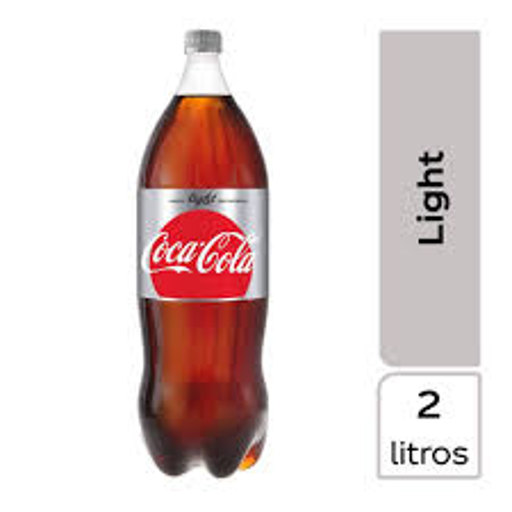

In [26]:
v = foods[foods['description'].str.lower().str.contains('vodka')].sample(1)
print(v[['description','category']])
op(v.index[0])

In [27]:
v

,food_id,description,product_name,category,energy,protein,carb,fat,clip,accuracy
id,,,,,,,,,,
93993,1104448,Vodka and diet cola,Coca Cola Light - 2.5 Lts,Liquor and cocktails,60.0,0.08,0.22,0.02,"[0.0154366605, 0.03923688, 0.018286353, 0.0272...",0.275001


                                             description  \
id                                                         
65720  Mexican casserole made with ground beef, beans...   

                         category  
id                                 
65720  Other Mexican mixed dishes  


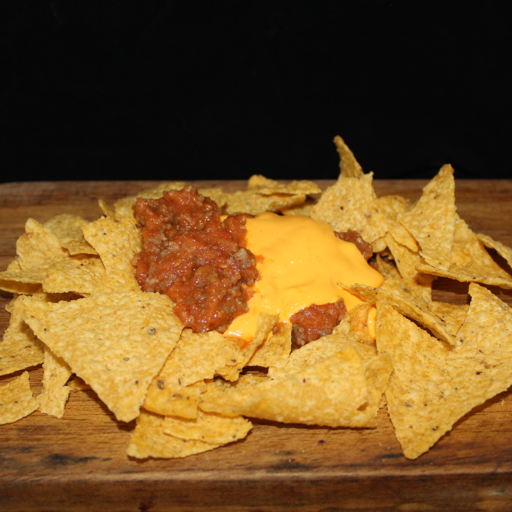

In [43]:
v = foods[foods['accuracy']<0.25].sample(1)
print(v[['description','category']])
op(v.index[0])

In [5]:
df = pd.read_sql("""select * from food.foods_prompted_images i """
                 ,engine)

In [17]:
df['url'] = df['path'].apply(mkurl)

In [15]:
df['url'] = df['url'].apply(make_clickable)

<function food.tools.make_clickable(val)>

In [ ]:
mkurl

In [18]:
df.sort_values('accuracy')

,id,food_id,country_code,store_name,product_name,path,accuracy,clip,url
26261,26257,1104437,IT,Stella sushi,107 Gamberi in agrodolce,CHBTGRR_0018841_1738670205.png,0.22251,"[0.018297475, 0.039561905, 0.0050578783, -0.01...",https://glovo.away.guru/photos_resized/CHBTGRR...
26260,26256,1104437,IT,Stella sushi,6 Yasai tempura,CHBTGRR_0018706_1738668860.png,0.22269,"[0.032533813, 0.025882611, -0.010736449, 0.014...",https://glovo.away.guru/photos_resized/CHBTGRR...
26259,26255,1104437,BG,5l Speakeasy Bar,Куин тай (150мл),TLKBCKH_0020513_2025985578.png,0.22496,"[0.04232997, 0.07250418, 0.022782855, 0.015975...",https://glovo.away.guru/photos_resized/TLKBCKH...
23373,23368,1104404,IT,Stella sushi,A 64 Sushi gio spicy croccante,CHBTGRR_0018856_1738670386.png,0.22501,"[0.029286195, 0.05367123, 0.006032316, 0.02379...",https://glovo.away.guru/photos_resized/CHBTGRR...
18992,18960,1101277,EC,Bananis,Kids Box,GTLLNRR_0216001_1176283747.png,0.22537,"[0.0354469, -0.044657875, 0.006895677, 0.06065...",https://glovo.away.guru/photos_resized/GTLLNRR...
...,...,...,...,...,...,...,...,...,...
1415,1414,1097783,ES,AS_125,Fórmula Infantil Enfagrow Premium Pro Mental V...,PPKWSJR_0026747_1274134466.png,0.36137,"[-0.0022123365, 0.054602142, 0.028949294, 0.04...",https://glovo.away.guru/photos_resized/PPKWSJR...
1179,1179,1097740,PE,AS_117,Fórmula Infantil Similac Neosure 370gr.,VJTTJQD_0063416_1174902870.png,0.36307,"[0.0059954235, 0.04113734, 0.0065911193, 0.071...",https://glovo.away.guru/photos_resized/VJTTJQD...
1159,1159,1097737,PE,AS_117,Fórmula Infantil Similac Neosure 370gr.,VJTTJQD_0063416_1174902870.png,0.36332,"[0.0059954235, 0.04113734, 0.0065911193, 0.071...",https://glovo.away.guru/photos_resized/VJTTJQD...
1414,1413,1097783,ES,AS_039,Enfagrow Premium * 800 Grs (Con 6.5 + Dha),BFDKZRG_0080100_1165656224.png,0.36776,"[-0.008420226, 0.063660815, 0.04595777, 0.0486...",https://glovo.away.guru/photos_resized/BFDKZRG...


In [ ]:
df.sort_values('accuracy')